# Remember, sequences are reversed!

In [2]:
%matplotlib inline
import torch
import numpy as np
from abc import ABC, abstractmethod
from scripts.stlcg import *
from scripts.stlviz import make_stl_graph
from scripts.util import *

import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [3]:
x_np = np.array([5, 4, 3, 2, 1, 0, 1, 2, 3, 4], dtype=np.float32).reshape([1, 10, 1])
w_np = np.array([0, 1, 2, 3, 4, 3, 3, 3, 2, 2], dtype=np.float32).reshape([1, 10, 1])
x = torch.tensor(x_np, requires_grad=False)
w = torch.tensor(w_np, requires_grad=False)
c = torch.tensor(4.0, dtype=torch.float, requires_grad=True)
d = torch.tensor(4.0, dtype=torch.float, requires_grad=True)

In [4]:
GThan = GreaterThan(name="x", c=c)
print(GThan)
LThan = LessThan(name="w", c=d)
print(LThan)
Eq = Equal(name="x", c=d)
print(Eq)
An = And(subformula1=LThan, subformula2=GThan)
print(Eq)
Alw = Always(subformula=An)
print(Alw)
Ev = Eventually(subformula=An)
print(Ev)
Unt = Until(subformula1=GThan, subformula2=Always(subformula=LThan))
print(Unt)

x >= 4.0
w <= 4.0
x = 4.0
x = 4.0
◻ [0, inf]( (w <= 4.0) ∧ (x >= 4.0) )
♢ [0, inf]( (w <= 4.0) ∧ (x >= 4.0) )
(x >= 4.0) U (◻ [0, inf]( w <= 4.0 ))


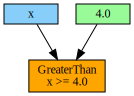

In [5]:
make_stl_graph(GThan)

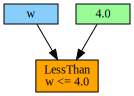

In [6]:
make_stl_graph(LThan)

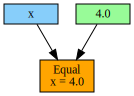

In [7]:
make_stl_graph(Eq)

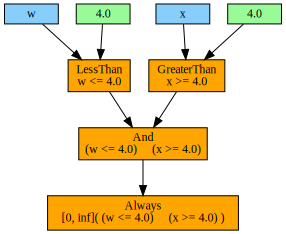

In [8]:
make_stl_graph(Alw)

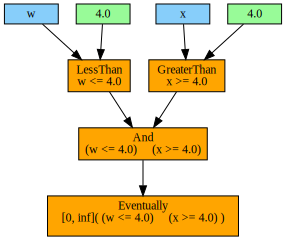

In [9]:
make_stl_graph(Ev)

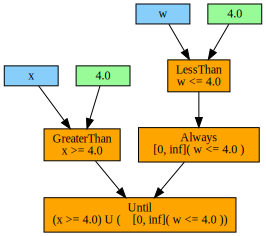

In [10]:
make_stl_graph(Unt)

# Testing grad functionality

In [113]:
device = torch.device("cpu")
learning_rate = 0.01
def print_learning_progress(var_dict, i, loss):
    vals = [i, loss]
    string = "iteration: %i -- loss: %.3f"
    for (k,v) in var_dict.items():
        string += " ---- %s:%.3f"
        vals.append(k)
        vals.append(v)
    print(string%tuple(vals))

In [123]:
x_np = np.array([5, 4, 3, 2, 1, 0, 1, 2, 3, 4], dtype=np.float32).reshape([1, 10, 1])
w_np = np.array([2, 2, 2, 3, 4, 3, 3, 3, 2, 2], dtype=np.float32).reshape([1, 10, 1])
x = torch.tensor(x_np, requires_grad=False)
w = torch.tensor(w_np, requires_grad=False)
c = torch.tensor(6.0, dtype=torch.float, requires_grad=True)
d = torch.tensor(1.0, dtype=torch.float, requires_grad=True)
W = w + torch.randn([20,10,1], requires_grad=False)


(w <= 1.0) T (w >= 6.0)


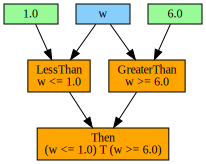

In [124]:
GThan = GreaterThan(name="w", c=c)
LThan = LessThan(name="w", c=d)

Unt = Until(subformula1=LThan, subformula2=Always(subformula=GThan))
Th = Then(subformula1=LThan, subformula2=GThan)
print(Th)
model = Th
var_dict = {"c":c, "d":d}


optimizer = torch.optim.Adam(var_dict.values(), lr=learning_rate)
scale = 5
make_stl_graph(model)

In [125]:
for i in range(500):
    learning_rate = 0.01 - 0.01*i/500. + 0.000001
    scale = 5 - i/500.
    trace1 = model.subformula1(w, scale=scale)
    trace2 = model.subformula2(w, scale=scale)
    robustness = model.robustness(trace1, trace2, scale=scale)
#     print(robustness)
    loss = torch.abs(model.robustness(trace1, trace2, scale=scale)).mean()
    print_learning_progress(var_dict, i, loss)
    loss.backward()
    with torch.no_grad():
        c -= learning_rate * c.grad
        c.grad.zero_()
        d -= learning_rate * d.grad
        d.grad.zero_()

iteration: 0 -- loss: 20.000 ---- c:6.000 ---- d:1.000
iteration: 1 -- loss: 19.742 ---- c:5.950 ---- d:1.000
iteration: 2 -- loss: 19.485 ---- c:5.900 ---- d:1.000
iteration: 3 -- loss: 19.229 ---- c:5.850 ---- d:1.000
iteration: 4 -- loss: 18.973 ---- c:5.801 ---- d:1.000
iteration: 5 -- loss: 18.718 ---- c:5.751 ---- d:1.000
iteration: 6 -- loss: 18.464 ---- c:5.702 ---- d:1.000
iteration: 7 -- loss: 18.211 ---- c:5.652 ---- d:1.000
iteration: 8 -- loss: 17.959 ---- c:5.603 ---- d:1.000
iteration: 9 -- loss: 17.707 ---- c:5.554 ---- d:1.000
iteration: 10 -- loss: 17.457 ---- c:5.505 ---- d:1.000
iteration: 11 -- loss: 17.207 ---- c:5.457 ---- d:1.000
iteration: 12 -- loss: 16.957 ---- c:5.408 ---- d:1.000
iteration: 13 -- loss: 16.709 ---- c:5.359 ---- d:1.000
iteration: 14 -- loss: 16.461 ---- c:5.311 ---- d:1.000
iteration: 15 -- loss: 16.215 ---- c:5.262 ---- d:1.000
iteration: 16 -- loss: 15.968 ---- c:5.214 ---- d:1.000
iteration: 17 -- loss: 15.723 ---- c:5.166 ---- d:1.000
it

iteration: 161 -- loss: 0.032 ---- c:2.007 ---- d:1.993
iteration: 162 -- loss: 0.043 ---- c:1.991 ---- d:2.009
iteration: 163 -- loss: 0.031 ---- c:2.007 ---- d:1.993
iteration: 164 -- loss: 0.042 ---- c:1.991 ---- d:2.009
iteration: 165 -- loss: 0.031 ---- c:2.007 ---- d:1.993
iteration: 166 -- loss: 0.042 ---- c:1.991 ---- d:2.009
iteration: 167 -- loss: 0.031 ---- c:2.007 ---- d:1.993
iteration: 168 -- loss: 0.042 ---- c:1.991 ---- d:2.009
iteration: 169 -- loss: 0.031 ---- c:2.007 ---- d:1.993
iteration: 170 -- loss: 0.041 ---- c:1.991 ---- d:2.009
iteration: 171 -- loss: 0.030 ---- c:2.006 ---- d:1.994
iteration: 172 -- loss: 0.041 ---- c:1.991 ---- d:2.009
iteration: 173 -- loss: 0.030 ---- c:2.006 ---- d:1.994
iteration: 174 -- loss: 0.041 ---- c:1.991 ---- d:2.009
iteration: 175 -- loss: 0.030 ---- c:2.006 ---- d:1.994
iteration: 176 -- loss: 0.041 ---- c:1.991 ---- d:2.009
iteration: 177 -- loss: 0.029 ---- c:2.006 ---- d:1.994
iteration: 178 -- loss: 0.040 ---- c:1.991 ---- 

iteration: 315 -- loss: 0.013 ---- c:2.003 ---- d:1.997
iteration: 316 -- loss: 0.023 ---- c:1.995 ---- d:2.005
iteration: 317 -- loss: 0.012 ---- c:2.003 ---- d:1.997
iteration: 318 -- loss: 0.023 ---- c:1.995 ---- d:2.005
iteration: 319 -- loss: 0.012 ---- c:2.003 ---- d:1.997
iteration: 320 -- loss: 0.022 ---- c:1.995 ---- d:2.005
iteration: 321 -- loss: 0.012 ---- c:2.003 ---- d:1.997
iteration: 322 -- loss: 0.022 ---- c:1.995 ---- d:2.005
iteration: 323 -- loss: 0.012 ---- c:2.003 ---- d:1.997
iteration: 324 -- loss: 0.022 ---- c:1.995 ---- d:2.005
iteration: 325 -- loss: 0.011 ---- c:2.003 ---- d:1.997
iteration: 326 -- loss: 0.022 ---- c:1.995 ---- d:2.005
iteration: 327 -- loss: 0.011 ---- c:2.003 ---- d:1.997
iteration: 328 -- loss: 0.021 ---- c:1.995 ---- d:2.005
iteration: 329 -- loss: 0.011 ---- c:2.003 ---- d:1.997
iteration: 330 -- loss: 0.021 ---- c:1.995 ---- d:2.005
iteration: 331 -- loss: 0.011 ---- c:2.002 ---- d:1.998
iteration: 332 -- loss: 0.021 ---- c:1.995 ---- 

iteration: 484 -- loss: 0.003 ---- c:2.001 ---- d:1.999
iteration: 485 -- loss: 0.000 ---- c:2.000 ---- d:2.000
iteration: 486 -- loss: 0.002 ---- c:1.999 ---- d:2.001
iteration: 487 -- loss: 0.000 ---- c:2.000 ---- d:2.000
iteration: 488 -- loss: 0.002 ---- c:2.001 ---- d:1.999
iteration: 489 -- loss: 0.000 ---- c:2.000 ---- d:2.000
iteration: 490 -- loss: 0.002 ---- c:2.000 ---- d:2.000
iteration: 491 -- loss: 0.000 ---- c:2.000 ---- d:2.000
iteration: 492 -- loss: 0.001 ---- c:2.000 ---- d:2.000
iteration: 493 -- loss: 0.000 ---- c:2.000 ---- d:2.000
iteration: 494 -- loss: 0.001 ---- c:2.000 ---- d:2.000
iteration: 495 -- loss: 0.000 ---- c:2.000 ---- d:2.000
iteration: 496 -- loss: 0.001 ---- c:2.000 ---- d:2.000
iteration: 497 -- loss: 0.000 ---- c:2.000 ---- d:2.000
iteration: 498 -- loss: 0.000 ---- c:2.000 ---- d:2.000
iteration: 499 -- loss: 0.000 ---- c:2.000 ---- d:2.000


In [126]:
# oper = "min"
def foo(a, b, s, scale, large_num, oper):
    mask = torch.arange(0.5, 10.5, 1.0, dtype=torch.float32)
    # a = torch.tensor(1, requires_grad=True, dtype=torch.float32)
    # b = torch.tensor(6, requires_grad=True, dtype=torch.float32)
    # s = torch.tensor(5, requires_grad=False, dtype=torch.float32)
    mask = bump(mask, a, b, s).reshape([1, 10, 1])
    out = bump_transform(oper, x, mask, scale=scale, large_num=10**large_num)
    idx = torch.argmin(out).numpy().item() if oper == "min" else torch.argmax(out).numpy().item()
    plt.figure(figsize=(15, 6))
    plt.plot([a, a], [-5, 5], 'k--')
    plt.plot([b, b], [-5, 5], 'k--')
    plt.plot(x[0,:,0].numpy(), linewidth=3)
    plt.plot(mask[0,:,0].detach().numpy())
    plt.plot(out[0,:,0].detach().numpy())
    plt.scatter(idx, x[0,idx,0].detach().numpy(), s=100)
    plt.axis([0, 10, -5, 5])

In [127]:
interact(foo, a=(0,10), b=(0,10), s=(1,100, 0.5), scale=(1, 50), large_num=(2, 8), oper=["min", "max"])

interactive(children=(IntSlider(value=5, description='a', max=10), IntSlider(value=5, description='b', max=10)…

<function __main__.foo(a, b, s, scale, large_num, oper)>

In [2]:
x_np = np.array([2.2, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1, 0.1, 0.1], dtype=np.float32).reshape([1, 10, 1])
w_np = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1], dtype=np.float32).reshape([1, 10, 1])
x = torch.tensor(x_np, requires_grad=False) + torch.randn([1, 10, 1])*0.0
w = torch.tensor(w_np, requires_grad=False)
a = torch.tensor(0, requires_grad=True, dtype=torch.float32)
b = torch.tensor(10, requires_grad=True, dtype=torch.float32)
rnn_dim = 10

In [3]:
opt_tau = [a, b, rnn_dim]

In [4]:
model = Always(opt_tau=opt_tau)
scale = 10
learning_rate = 0.01

In [5]:
x

tensor([[[2.2000],
         [2.0000],
         [2.0000],
         [2.0000],
         [2.0000],
         [2.0000],
         [2.0000],
         [0.1000],
         [0.1000],
         [0.1000]]])

In [ ]:
model(x)

break
In [1]: out
Out[1]: 
tensor([[[5.0000e+07],
         [1.1921e+07],
         [1.7995e+06],
         [2.4826e+05],
         [3.5061e+04],
         [1.0000e+04],
         [3.5067e+04],
         [2.4826e+05],
         [1.7995e+06],
         [1.1921e+07],
         [1.1000e+04]]], grad_fn=<MulBackward0>)

In [2]: input_
Out[2]: 
tensor([[[1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [1.0000e+04],
         [2.2000e+00]]])

In [3]: output
Out[3]: tensor([[[10000.]]], grad_fn=<MinBackward0>)

In [4]: exit

break
In [1]: out
Out[1]: 
tensor([[[5.0000e+07],
         [1.1921e+07],
         [1.7995e+06],
         [2.4826e+05],
         [3.5061e+04],
         [1.0000e+04],
         [3.5067e+04],
         [2.4826e+05],
         [1.7995e+06],
         [2.6226e+03],
         [1.0000e+04]]], grad_fn=<MulBackward0>)

In [2]: exit

break
In 

In [20]:
trace1 = x
for i in range(100):
    
    loss = (model.robustness(trace1, scale=scale)).mean()**2
        
        
    loss.backward()
    with torch.no_grad():
        
        print("iteration: ", i, " ----  a =", a.detach().numpy(), " ----  b =", b.detach().numpy(), "  ----  loss =", loss.detach().numpy())
#         print("iteration: ", i, " ----  a =", a.grad, " ----  b =", b.grad)
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        a.grad.zero_()
        b.grad.zero_()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [3]:
subformula = GThan
interval = None
opt_tau = ([a, b], rnn_dim)
if opt_tau is None:
    _interval = [0, np.inf] if interval is None else interval
    rnn_dim = 1 if not interval else interval[-1]
    steps = 1 if not interval else interval[-1] - interval[0] + 1
else:
    a, b = opt_tau[0]
    rnn_dim = rnn_dim
    _interval = [rnn_dim - b, rnn_dim - a]
    steps = None
    

operation = Minish()

s = 100

In [4]:
?torch.sign

In [6]:
def _initialize_rnn_cell(x):
    init_val = 10*torch.max(x)
    h0 = torch.ones([x.shape[0], rnn_dim, x.shape[2]])*init_val
    return h0.to(x.device)

def _rnn_cell(x, h0, scale):
    '''
    x is [batch_size, 1, x_dim]
    h0 is [batch_size, rnn_dim, x_dim]
    '''
    if operation is None:
        raise Exception()

    if opt_tau is None:
        if self.interval is None:   
            input_ = torch.cat([h0, x], dim=1)                          # [batch_size, rnn_dim+1, x_dim]
            output = state = self.operation(input_, scale, dim=1)       # [batch_size, 1, x_dim]
        else:
            h0x = torch.cat([h0, x], dim=1)                             # [batch_size, rnn_dim+1, x_dim]
            input_ = h0x[:,:self.steps,:]                               # [batch_size, self.steps, x_dim]
            output = self.operation(input_, scale, dim=1)               # [batch_size, 1, x_dim]
            state = h0x[:,1:,:]                                         # [batch_size, rnn_dim, x_dim]
    else:
        input_ = torch.cat([h0, x], dim=1) 
        mask = torch.arange(0, rnn_dim + 1, 1, dtype=torch.float32)
        mask = bump(mask, _interval[0], _interval[1], s).reshape([1, rnn_dim + 1, 1])
        out = bump_transform("min", input_, mask, scale=100, large_num=1E7)
        idx = torch.argmin(out)
        print("input is ", x, "the min value is ", input_[0,idx,0])
        output = operation(out, scale)
        state = input_[:,1:,:]
#         IPython.embed(banner1="break")
        
    return output, state

def _run_cell(x, scale):
    outputs = []
    states = []
    h = _initialize_rnn_cell(x)                                # [batch_size, rnn_dim, x_dim]
    xs = torch.split(x, 1, dim=1)                                   # time_dim tuple
    time_dim = len(xs)
    for i in range(time_dim):
        o, h = _rnn_cell(xs[i], h, scale)
        outputs.append(o)
        states.append(h)

    return outputs, states

In [10]:
os, ss = _run_cell(x, 0)

input is  tensor([[[0.1086]]]) the min value is  tensor(39.9921)
input is  tensor([[[-0.0921]]]) the min value is  tensor(39.9921)
input is  tensor([[[0.2991]]]) the min value is  tensor(0.1086)
input is  tensor([[[3.9992]]]) the min value is  tensor(-0.0921)
input is  tensor([[[0.1067]]]) the min value is  tensor(-0.0921)
input is  tensor([[[-0.1096]]]) the min value is  tensor(-0.0921)
input is  tensor([[[0.4932]]]) the min value is  tensor(-0.0921)
input is  tensor([[[0.6030]]]) the min value is  tensor(-0.1096)
input is  tensor([[[-0.3074]]]) the min value is  tensor(-0.1096)
input is  tensor([[[-0.0907]]]) the min value is  tensor(-0.1096)


[tensor([[[39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [ 0.1086]]]), tensor([[[39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [ 0.1086],
          [-0.0921]]]), tensor([[[39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [ 0.1086],
          [-0.0921],
          [ 0.2991]]]), tensor([[[39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [ 0.1086],
          [-0.0921],
          [ 0.2991],
          [ 3.9992]]]), tensor([[[39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [39.9921],
          [ 0.1086],
          [-0.0921],
     